<a href="https://colab.research.google.com/github/yohanesnuwara/python-bootcamp-for-geoengineers/blob/master/EnP_training/session4_mbal_instructor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Material Balance Analysis with Python 

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# clone "pyreservoir" repository
!git clone https://github.com/yohanesnuwara/pyreservoir

Cloning into 'pyreservoir'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 780 (delta 63), reused 0 (delta 0), pack-reused 658
Receiving objects: 100% (780/780), 24.02 MiB | 7.95 MiB/s, done.
Resolving deltas: 100% (417/417), done.


In [ ]:
# import system and define path
import sys
sys.path.append('/content/pyreservoir/matbal')

In [ ]:
# import "mbal" module and from that import the functions
from mbal import drygas, gascondensate, oil

## Intro to Regression (Curve-fitting)

Linear regression is the basis of material balance plot analysis. To be well-versed with our subsequent training, we will do a simple linear regression with `Scipy`. 

In [ ]:
# import curve_fit from Scipy optimize
from scipy.optimize import curve_fit

First, make a dummy data. Add with random noise. 

In [ ]:
# create function
def linear(x, a, b):
  y = a * x + b
  return y

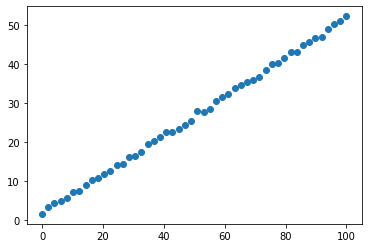

In [ ]:
# create dummy data with a=0.5 and b=1. 
# add with random noise, multiplied by 1.5.
x = np.linspace(0, 100, 50)
y = linear(x, 0.5, 1)
noise = np.random.random(50) * 1.5
y = y + noise

plt.plot(x,y,'o')
plt.show()

In [ ]:
# do linear regression on x and y dummy data
popt, pcov = curve_fit(linear, x, y)

a, b = popt
print(a, b)

0.5014676464752442 1.6817879092707164


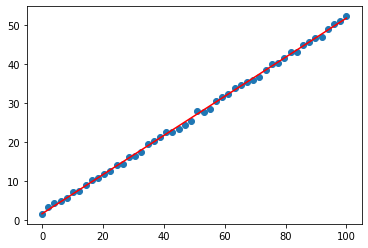

In [ ]:
# plot the linear fit line with dummy data
yreg = a * x + b

plt.plot(x,y,'o')
plt.plot(x, yreg, 'r-')
plt.show()

## Dry-gas material balance

We will do material balance plot analysis on a dry-gas reservoir; the data is from the U.S. Gulf Coast gas reservoir (Source: Brian F. Towler book).

First we will load the production data.

In [ ]:
# load production data
df = pd.read_csv('/content/pyreservoir/data/dry_gas_with_waterdrive.csv')

df.head(10)

,t,p,Gp,Np,total_Gp,Wp,Bg,Bw,z
0,0.0,8490.0,0.0,0.0,0.00,0,0.5404,1.0518,1.271392
1,0.5,8330.0,1758.0,2000.0,1759.42,0,0.5458,1.0520,1.259897
2,1.0,8323.0,5852.0,30000.0,5873.24,1000,0.5460,1.0520,1.259299
3,1.5,8166.0,10410.0,66000.0,10456.73,3000,0.5516,1.0522,1.248217
4,2.0,8100.0,14828.0,98000.0,14897.38,4000,0.5540,1.0522,1.243516
5,2.5,7905.0,21097.0,138000.0,21194.70,7000,0.5614,1.0524,1.229789
6,3.0,7854.0,26399.0,180000.0,26526.44,9000,0.5634,1.0525,1.226208
7,3.5,7858.0,30042.0,215000.0,30194.22,10000,0.5632,1.0525,1.226397
8,4.0,7900.0,32766.0,237000.0,32933.80,11000,0.5616,1.0524,1.229449
9,4.5,7971.0,34548.0,257000.0,34729.96,11000,0.5588,1.0524,1.234314


We want to plot the reservoir pressure, cum. oil production, and cum. gas production into one plot. 

In [ ]:
# Define variables for to visualize
t = df['t'].values
Gp = df['Gp'].values
Np = df['Np'].values
p = df['p'].values

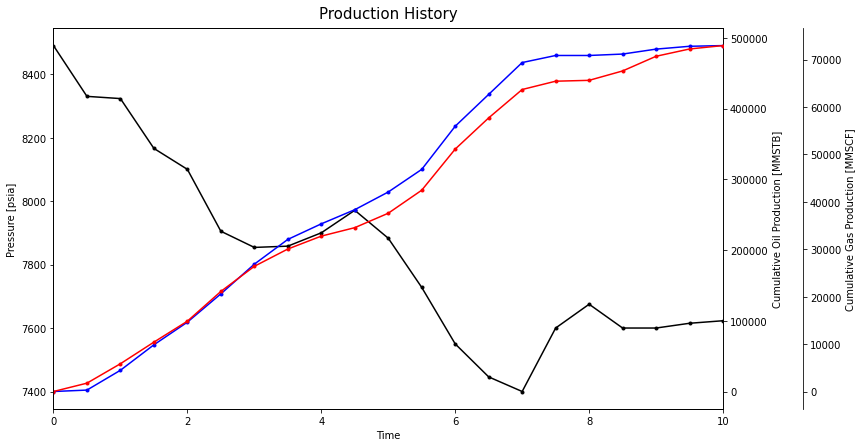

In [ ]:
# Plot pressure and cum production in one plot: use .twinx()
fig = plt.figure(figsize=(12,7))
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.plot(t, p, '.-', color='black')
par1.plot(t, Np, '.-', color='blue')
par2.plot(t, Gp, '.-', color='red')

host.set_title('Production History', size=15, pad=10)
host.set_xlim(0, max(t))
host.set_xlabel('Time')
host.set_ylabel('Pressure [psia]')
par1.set_ylabel('Cumulative Oil Production [MMSTB]')
par2.set_ylabel('Cumulative Gas Production [MMSCF]')

par2.spines['right'].set_position(('outward', 80))

plt.show()

Now, the material balance plot analysis.

The reservoir has some properties as listed:
* Formation compressibility 3.5 microsip
* Water compressibility 2.9 microsip
* Initial water saturation 0.21

And also, some variables in the production data are NOT recorded in FIELD UNITS. They are:
* Cum. gas production [MMSCF]
* Gas FVF [RB / MSCF]

In [ ]:
# see help to find out the required inputs
help(drygas)

Help on class drygas in module mbal:

class drygas(builtins.object)
 |  Dry-Gas Material Balance Plot
 |  
 |  Methods defined here:
 |  
 |  calculate_params(self, p, Bg, Gp, cf, cw, swi)
 |      Calculate Material Balance Paramaters for Dry-Gas Reservoir
 |      
 |      Output: F, Btg, Efw, Eg
 |  
 |  plot(self, p, z, Gp, F, Btg, Efw, Eg)
 |      Create Material Balance Plots for Dry-Gas Reservoir
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



/content/pyreservoir/matbal/mbal.py:143: RuntimeWarning: invalid value encountered in true_divide
  x3, y3 = Gp, (F / Eg)


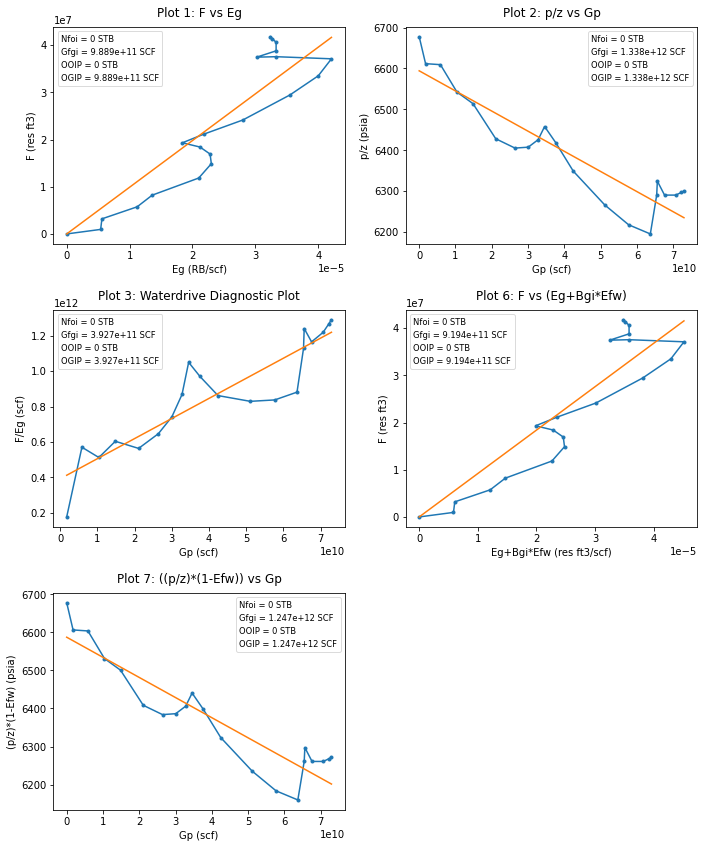

(array([       0.        ,   959516.4       ,  3195192.        ,
         5742156.        ,  8214712.        , 11843855.8       ,
        14873196.6       , 16919654.4       , 18401385.6       ,
        19305422.4       , 21133098.        , 24126306.4       ,
        29438280.3       , 33487338.8       , 37092435.        ,
        37538338.4       , 37438777.8       , 38778104.1       ,
        40553705.6       , 41392720.60000001, 41781750.4       ]),
 array([0.00e+00, 5.40e-06, 5.60e-06, 1.12e-05, 1.36e-05, 2.10e-05,
        2.30e-05, 2.28e-05, 2.12e-05, 1.84e-05, 2.18e-05, 2.80e-05,
        3.55e-05, 4.00e-05, 4.21e-05, 3.33e-05, 3.02e-05, 3.33e-05,
        3.33e-05, 3.27e-05, 3.24e-05]),
 array([0.        , 0.0008322 , 0.00086861, 0.00168521, 0.00202849,
        0.00304274, 0.00330801, 0.0032872 , 0.00306875, 0.00269946,
        0.00315717, 0.00396336, 0.00488919, 0.00543012, 0.00566938,
        0.00462913, 0.00423903, 0.00462913, 0.00462913, 0.00455111,
        0.0045095 ]))

In [ ]:
# input all the required ones. 
# variables need conversion: Bg, Gp

Bg = df['Bg'].values * (1 / 1E+3) # convert to RB/scf
Gp = df['Gp'].values * (1E+6) # convert to scf
cf = 3.5E-6 # sip
cw = 2.9E-6 # sip
swi = 0.21
z = df['z'].values

# calculate parameters for plotting: use function "calculate_params"
x = drygas()
F, Btg, Efw, Eg = x.calculate_params(p, Bg, Gp, cf, cw, swi)

# create MBAL plots and automatically give in place results
plt.figure(figsize=(10,12)) # define the figure size
x.plot(p, z, Gp, F, Btg, Efw, Eg)

## Gas-condensate reservoir

We will do material balance plot analysis on a gas-condensate reservoir; the data is from the Bacon Lime gas reservoir (Source: Brian F. Towler book).

In [ ]:
# load production data
df = pd.read_csv('/content/pyreservoir/data/baconlime_gas_condensate.csv')

df.head(10)

,p,Np,Gp,Bg,Bo,Rs,Rv,z
0,3700.0,0.0,0.00,0.87,10.058,11560.7,86.5,0.93177
1,3650.0,28600.0,0.34,0.88,2.417,2378.0,81.5,0.92941
2,3400.0,93000.0,1.20,0.92,2.192,2010.0,70.5,0.91859
3,3100.0,231000.0,3.30,0.99,1.916,1569.0,56.2,0.90791
4,2800.0,270000.0,4.30,1.08,1.736,1272.0,46.5,0.90013
5,2500.0,379000.0,6.60,1.20,1.617,1067.0,39.5,0.89566
6,2200.0,481000.0,9.10,1.35,1.504,873.0,33.8,0.89485
7,1900.0,517200.0,10.50,1.56,1.416,719.0,29.9,0.89795
8,1600.0,549000.0,12.00,1.85,1.326,565.0,27.3,0.90507
9,1300.0,580000.0,12.80,2.28,1.268,461.0,25.5,0.91611


Now, the material balance plot analysis.

The reservoir has some properties as listed:
* Formation and water are incompressible (0 sip)
* Initial water saturation 0.2
* Dewpoint pressure 3,691 psia
* No gas injection

And also, some variables in the production data are NOT recorded in FIELD UNITS. They are:
* Cum. gas production [BSCF]
* Gas FVF [RB / MSCF]
* Volatile oil-gas ratio [STB / MMSCF]

In [ ]:
# see help to find out the required inputs
help(gascondensate)

Help on class gascondensate in module mbal:

class gascondensate(builtins.object)
 |  Gas-Condensate Material Balance Plot
 |  
 |  Methods defined here:
 |  
 |  calculate_params(self, p, pdew, Bg, Bo, Np, Gp, Gi, cf, cw, swi, Rs, Rv)
 |      Calculate Material Balance Paramaters for Gas-Condensate Reservoir
 |      
 |      Output: F, Btg, Efw, Eg
 |  
 |  plot(self, p, z, Gp, F, Btg, Efw, Eg, Rv)
 |      Create Material Balance Plots for Dry-Gas Reservoir
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



/content/pyreservoir/matbal/mbal.py:362: RuntimeWarning: invalid value encountered in true_divide
  x3, y3 = Gp, (F / Eg)


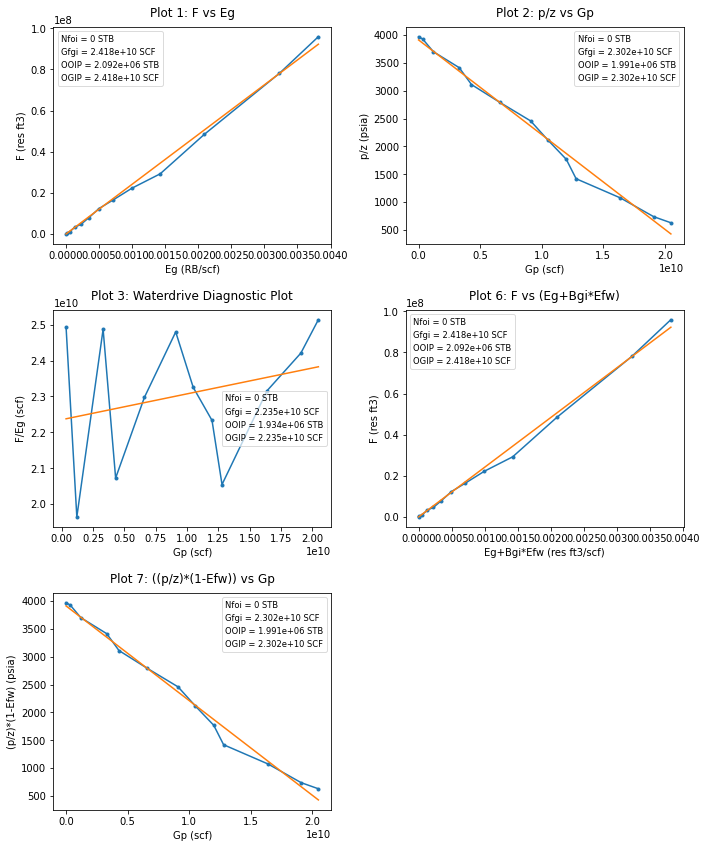

(array([       0.        ,   299558.07852462,  1107354.93041437,
         3285114.17028451,  4670970.14195644,  7961571.88964701,
        12343155.55832162, 16441143.13114773, 22263131.82686345,
        29239665.28526088, 48424305.0861038 , 78147206.39933419,
        95961416.12370604]),
 array([0.00000000e+00, 1.20116771e-05, 5.63903436e-05, 1.32052248e-04,
        2.25400509e-04, 3.46516304e-04, 4.97672690e-04, 7.07026820e-04,
        9.96880778e-04, 1.42338952e-03, 2.09072925e-03, 3.22765428e-03,
        3.81632116e-03]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [ ]:
# input all the required ones. Gi = 0 (no gas injection)
# variables need conversion: Bg, Gp, Rv. 

p = df['p'].values
pdew = 3691 # dewpoint pressure, psia
Bg = df['Bg'].values * (1 / 1E+3) # convert to RB/scf
Bo = df['Bo'].values
Np = df['Np'].values 
Gp = df['Gp'].values * 1E+9 # convert to SCF
Gi = np.zeros(len(df)) # no gas injection
cf = 0
cw = 0
swi = 0.1
Rs = df['Rs'].values
Rv = df['Rv'].values * (1 / 1E+6) # convert to STB/SCF
z = df['z'].values

# calculate parameters for plotting: use function "calculate_params"
x = gascondensate()
F, Btg, Efw, Eg = x.calculate_params(p, pdew, Bg, Bo, Np, Gp, Gi, cf, cw, swi, Rs, Rv)

# create MBAL plots and automatically give in place results
plt.figure(figsize=(10,12)) 
x.plot(p, z, Gp, F, Btg, Efw, Eg, Rv)


## Saturated Volatile Oil Reservoir

We will do material balance plot analysis on a saturated volatile oil reservoir; the data is from the Prudhoe Bay oil reservoir (Source: Brian F. Towler book).

In [ ]:
# load production data
columns = ['p', 'Bo', 'Bg', 'Rs', 'Rv', 'Np', 'Gp']
df = pd.read_csv('/content/pyreservoir/data/Table 12.16 (edited).csv', names=columns)

df.head(10)

,p,Bo,Bg,Rs,Rv,Np,Gp
0,4658.0,2.70727,0.830,2834,116,0,0.000000e+00
1,4598.0,2.63143,0.835,2711,111,1345320,3.360340e+09
2,4398.0,2.33771,0.853,2247,106,5847480,1.462202e+10
3,4198.0,2.20391,0.874,2019,94,10069920,2.592911e+10
4,3998.0,2.09309,0.901,1828,84,14145840,3.850768e+10
5,3798.0,1.99116,0.933,1651,74,17862120,5.272101e+10
6,3598.0,1.90524,0.970,1500,66,20952360,6.766090e+10
7,3398.0,1.82832,1.015,1364,60,23563080,8.400850e+10
8,3198.0,1.75726,1.066,1237,54,25814160,1.012640e+11
9,2998.0,1.68592,1.125,1111,49,27825480,1.194740e+11


Now, the material balance plot analysis.

The reservoir has some properties as listed:
* Formation and water are incompressible (0 sip)
* Initial water saturation 0.2
* No gas injection

And also, some variables in the production data are NOT recorded in FIELD UNITS. They are:
* Cum. gas production [100 * SCF]
* Cum. oil production [100 * STB]
* Gas FVF [RB / MSCF]
* Volatile oil-gas ratio [STB / MMSCF]

In [ ]:
# see help to find out the required inputs
help(oil)

Help on class oil in module mbal:

class oil(builtins.object)
 |  Oil (Undersaturated and saturated; Volatile and Non-volatile) Material Balance Plot
 |  
 |  Methods defined here:
 |  
 |  calculate_params(self, p, Bo, Bg, Rv, Rs, Np, Gp, Gi, cf, cw, swi)
 |      Calculate Material Balance Paramaters for Oil Reservoir
 |      
 |      Output: F, Bto, Btg, Efw, Eo, Eg
 |  
 |  gascap(self, Gfgi, Nfoi, Bg, Bo)
 |      Calculate Total Oil+Gas Expansion Factor from known Gas Cap ratio
 |      Gfgi and Nfoi known from volumetrics
 |  
 |  plot(self, oil_type, F, Bto, Btg, Efw, Eo, Eg, Np, Bo, Rs, Rv, start=0, end=-1, figsize=(10, 5))
 |      Create Material Balance Plots for Oil Reservoir
 |      
 |      Input:
 |      oil_type: 'undersaturated' or 'saturated'
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak re

/content/pyreservoir/matbal/mbal.py:613: RuntimeWarning: invalid value encountered in true_divide
  x1, y1 = (Eg / Eo), (F / Eo)
/content/pyreservoir/matbal/mbal.py:648: RuntimeWarning: invalid value encountered in true_divide
  x2, y2 =  (Eo / Eg), (F / Eg)


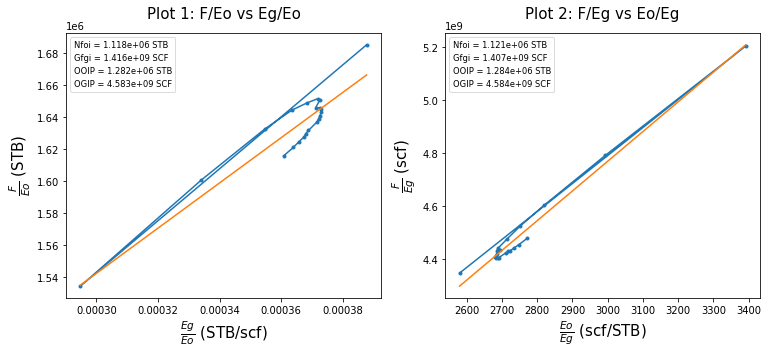

In [ ]:
# input all the required ones. Gi = 0 (no gas injection)
# variables need conversion: Bg, Gp, Np, Rv. 
p = df['p'].values
Bo = df['Bo'].values
Bg = df['Bg'].values * (1 / 1E+3) # convert RB/MSCF to RB/SCF
Rv = df['Rv'].values * (1 / 1E+6) # convert STB/MMSCF to STB/SCF
Rs = df['Rs'].values
Np = df['Np'].values / 100
Gp = df['Gp'].values / 100
Gi = np.zeros(len(df))
cf = 0
cw = 0
swi = 0.2

# calculate parameters for plotting: use function "calculate_params"
x = oil()
F, Bto, Btg, Efw, Eo, Eg = x.calculate_params(p, Bo, Bg, Rv, Rs, Np, Gp, Gi, cf, cw, swi)

# create MBAL plots and automatically give in place results
x.plot('saturated', F, Bto, Btg, Efw, Eo, Eg, Np, Bo, Rs, Rv, figsize=(16,5))


## Undersaturated Non-Volatile Oil Reservoir

We will do material balance plot analysis on an undersaturated non-volatile oil reservoir; the data is from Hugin reservoir in the Volve Field (Source: [Equinor Data Village](https://www.equinor.com/en/how-and-why/digitalisation-in-our-dna/volve-field-data-village-download.html)).

In [ ]:
# load production data
df = pd.read_csv('/content/pyreservoir/data/volve/volve_production.csv')

df.head(10)

,Date,p (psia),Np (STB),Gp (SCF),Wp (STB),Gi (SCF),Wi (STB),Rp (SCF/STB),Bo (RB/STB),Bg (RB/SCF),Rs (SCF/STB),Rv (STB/SCF)
0,2008-01-01,4780.59,0,0,0.00,0,0,0.000,1.304902,0.000962,627.711085,0.0
1,2008-02-01,4725.76,308749,250870000,2595.03,0,0,812.537,1.305797,0.000970,627.711085,0.0
2,2008-03-01,4521.70,833031,683581000,2767.48,0,0,820.595,1.309193,0.001003,627.711085,0.0
3,2008-04-01,4297.32,1301790,1091990000,5799.25,0,187124,838.837,1.313071,0.001043,627.711085,0.0
4,2008-05-01,4353.89,2090960,1769630000,108190.00,0,1579180,846.324,1.312078,0.001032,627.711085,0.0
5,2008-06-01,4359.69,2995280,2533180000,111174.00,0,2911280,845.724,1.311977,0.001031,627.711085,0.0
6,2008-07-01,4362.30,4041070,3408290000,113791.00,0,4370580,843.413,1.311931,0.001031,627.711085,0.0
7,2008-08-01,4309.95,5081590,4257410000,117418.00,0,5807020,837.811,1.312849,0.001041,627.711085,0.0
8,2008-09-01,4231.05,6290800,5234430000,120337.00,0,6834680,832.077,1.314241,0.001056,627.711085,0.0
9,2008-10-01,4085.44,7782460,6432630000,124899.00,0,9072140,826.555,1.316864,0.001086,627.711085,0.0


Now, the material balance plot analysis.

The reservoir has some properties as listed:
* Formation compressibility is 48.4 microsip
* Water compressibility is 46.7 microsip
* Initial water saturation 0.5
* There is gas injection

All variables are already in FIELD UNITS. No need for conversion.

In [ ]:
df.columns

Index(['Date', 'p (psia)', 'Np (STB)', 'Gp (SCF)', 'Wp (STB)', 'Gi (SCF)',
       'Wi (STB)', 'Rp (SCF/STB)', 'Bo (RB/STB)', 'Bg (RB/SCF)',
       'Rs (SCF/STB)', 'Rv (STB/SCF)'],
      dtype='object')

/content/pyreservoir/matbal/mbal.py:570: RuntimeWarning: invalid value encountered in true_divide
  x2, y2 = Np, F / (Eg + Boi * Efw)


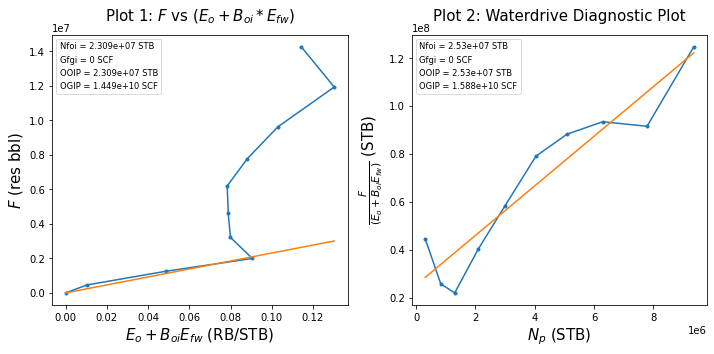

In [ ]:
# input all the required ones
p = df['p (psia)'].values
Bo = df['Bo (RB/STB)'].values
Bg = df['Bg (RB/SCF)'].values 
Rv = df['Rv (STB/SCF)'].values 
Rs = df['Rs (SCF/STB)'].values
Np = df['Np (STB)'].values 
Gp = df['Gp (SCF)'].values 
Gi = df['Gi (SCF)'].values
cf = 48.4E-6 # sip
cw = 46.7E-6 # sip
swi = 0.5

# calculate parameters for plotting: use function "calculate_params"
x = oil()
F, Bto, Btg, Efw, Eo, Eg = x.calculate_params(p, Bo, Bg, Rv, Rs, Np, Gp, Gi, cf, cw, swi)

# create MBAL plots and automatically give in place results
x.plot('undersaturated', F, Bto, Btg, Efw, Eo, Eg, Np, Bo, Rs, Rv, end=4)


## Comment: Why end=4? It seems that this reservoir is water-driven (after
## the first 4 points). Passing end=4 restricts the linear line, and it gives
## OOIP very near to the computed OOIP by someone else: 22 MMSTB. Ours is 23 MMSTB.

## Aquifer Influx Calculation from the Volve Field

The water drive is evident in the Hugin reservoir. We will calculate how many barrels of water encroach the reservoir using one of the models, the Van Everdingen and Hurst model. 

In [ ]:
# import veh function from aquifer
from aquifer import veh

In [ ]:
# see help to find the required inputs
help(veh)

Help on class veh in module aquifer:

class veh(builtins.object)
 |  Methods defined here:
 |  
 |  calculate_aquifer(self, datetime, pressure, cf, cw, perm, poro, mu_w, r_R, B_star)
 |  
 |  calculate_aquifer_constant(self, r_R, h, cf, cw, poro)
 |      Calculate theoretical aquifer constant for VEH (assuming cylindrical reservoir)
 |      
 |      Input:
 |      r_R = reservoir radius
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



It requires temporal data `datetime`, which is in the Date column. We need to convert it to Pandas datetime. 

In [ ]:
# convert to datetime format
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d') 

First we need to calculate what it's called as the aquifer constant. We will use `calculate_aquifer_constant` function. 

In [ ]:
# input the required ones
r_R = 1.5 * 3281 # reservoir radius, convert km to ft
h = 30 # reservoir thickness, ft
poro = 0.2 # porosity

# calculate aquifer constant (B') in unit RB/D-psi
y = veh()
B = y.calculate_aquifer_constant(r_R, h, cf, cw, poro)
B

15465.24600625215

Once we know the aquifer constant, we can calculate the aquifer influx. We will use `calculate_aquifer` function.

In [ ]:
# input the required ones
datetime = df['Date'].values
perm = 115 # permeability, md
mu_w = 0.318 # water viscosity, cp
B_star = B # aquifer constant, RB/D-psi

We_veh = y.calculate_aquifer(datetime, p, cf, cw, perm, poro, mu_w, r_R, B_star)
We_veh

[0.0,
 218423.6750121649,
 1312602.9832122535,
 3623991.36344805,
 5579843.410989863,
 7301926.773786984,
 8713892.343774613,
 10226633.880901858,
 12070882.910508154,
 14396972.092790337,
 16472063.833253667]

Finally we plot the aquifer influx.

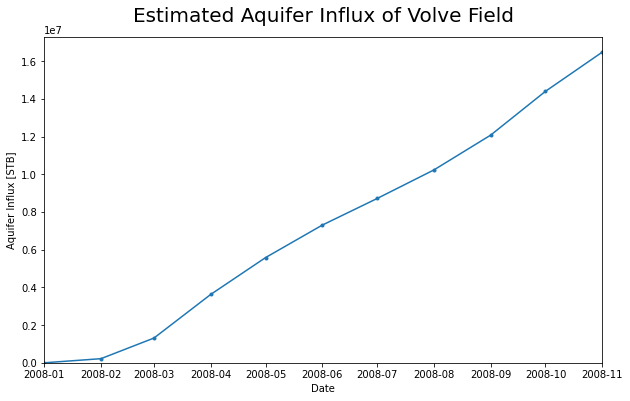

In [ ]:
# plot aquifer influx
plt.figure(figsize=(10,6))
plt.plot(datetime, We_veh, '.-')
plt.xlim(min(datetime), max(datetime))
plt.ylim(ymin=0)
plt.xlabel('Date'); plt.ylabel('Aquifer Influx [STB]')
plt.title('Estimated Aquifer Influx of Volve Field', size=20, pad=15)
plt.show()

## End of the training!

Now we know how to:
* Do simple linear regression
* Read production data
* Visualize production data (pressure, cumulative oil and gas productions) in one plot
* Create material balance plots for different types of reservoirs and estimate for Initial Hydrocarbon in Place:
  * Total oil original in place (OOIP)
  * Total gas original in place (OGIP)
  * Free-phase oil original in place (Nfoi)
  * Free-phase gas original in place (Gfgi)
* Calculate aquifer influx using VEH method

## Copyright

`PyReservoir` repository that stores all the functions and data, and this notebook, are copyrights of Yohanes Nuwara (2020). This notebook is contained in [this repository](https://github.com/yohanesnuwara/python-bootcamp-for-geoengineers) You may freely distribute for self-study and tutorials, but you will consider the authorship of all the codes written here. 

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.